In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels import api as sm
import numpy as np

In [2]:
df = pd.read_csv('~/Desktop/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
x=df.thal.value_counts()
x

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [6]:
x/x.sum()

2    0.530732
3    0.400000
1    0.062439
0    0.006829
Name: thal, dtype: float64

In [7]:
df['thal']=df.thal.fillna("Missing")
x=df.thal.value_counts()
x/x.sum()

2    0.530732
3    0.400000
1    0.062439
0    0.006829
Name: thal, dtype: float64

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.chol.describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

/var/folders/nc/sfbwykc541d4ktbn0q7gz6080000gp/T/ipykernel_73219/1339620784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.chol.dropna())


<Axes: xlabel='chol', ylabel='Density'>

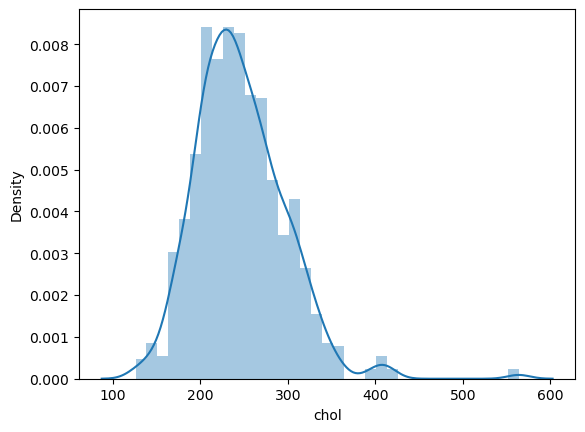

In [11]:
sns.distplot(df.chol.dropna())

In [12]:
mean_rbp=df.trestbps.dropna().mean()
print(mean_rbp)

131.61170731707318


In [13]:
len(df[df['trestbps']>mean_rbp])/len(df)

0.43414634146341463

In [14]:
len(df[df['trestbps']>mean_rbp])

445

In [15]:
445/len(df)

0.43414634146341463

In [16]:
df['agegrp']=pd.cut(df.age,[29,40,50,60,70,80])

In [17]:
df.agegrp.describe()

count         1021
unique           5
top       (50, 60]
freq           438
Name: agegrp, dtype: object

<Axes: xlabel='agegrp', ylabel='chol'>

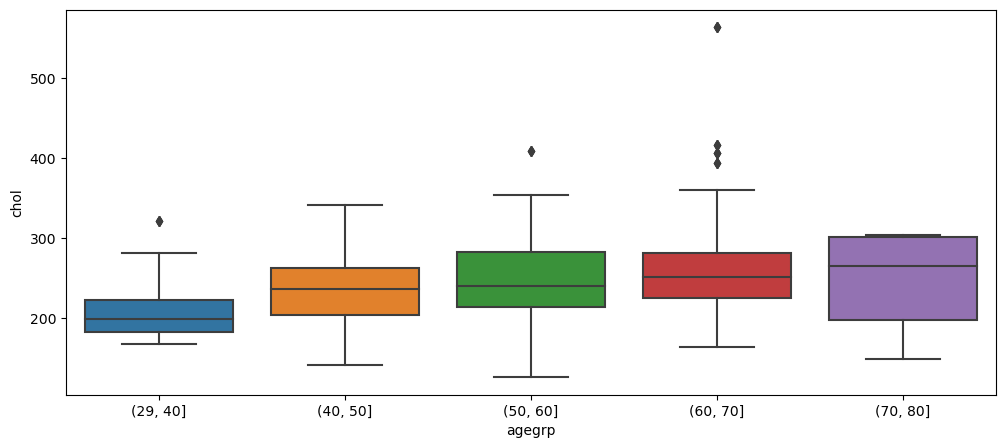

In [18]:
plt.figure(figsize=(12,5))
sns.boxplot(x='agegrp', y='chol', data=df)

<Axes: xlabel='agegrp', ylabel='chol'>

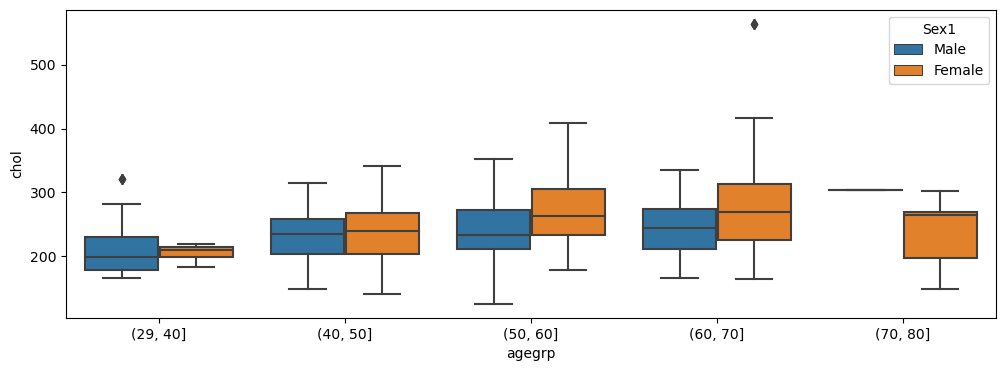

In [19]:
df['Sex1']=df.sex.replace({1:"Male", 0:"Female"})
plt.figure(figsize=(12,4))
sns.boxplot(x='agegrp', y='chol', hue='Sex1', data=df)

<Axes: xlabel='Sex1', ylabel='age'>

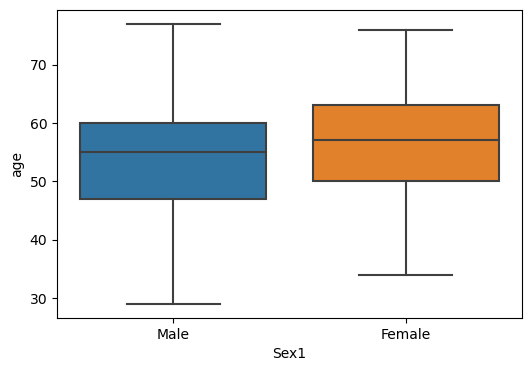

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Sex1', y='age', data=df)

In [28]:
df.groupby('agegrp')['cp'].value_counts().unstack()

cp,0,1,2,3
agegrp,,,,
"(29, 40]",23.0,7.0,24.0,10.0
"(40, 50]",95.0,65.0,81.0,6.0
"(50, 60]",225.0,69.0,110.0,34.0
"(60, 70]",147.0,16.0,62.0,27.0
"(70, 80]",7.0,6.0,7.0,NaN


In [33]:
dx=df.dropna().groupby(['agegrp','Sex1'])['cp'].value_counts().unstack()
dx

cp                   0     1     2     3
agegrp   Sex1                           
(29, 40] Female    4.0   3.0  10.0   NaN
         Male     19.0   4.0  14.0  10.0
(40, 50] Female   19.0  25.0  24.0   NaN
         Male     76.0  40.0  57.0   6.0
(50, 60] Female   50.0  20.0  36.0   7.0
         Male    175.0  49.0  74.0  27.0
(60, 70] Female   56.0   3.0  32.0   6.0
         Male     91.0  13.0  30.0  21.0
(70, 80] Female    4.0   6.0   7.0   NaN
         Male      3.0   NaN   NaN   NaN

In [34]:
df['cp_type']=df.cp.replace({0:"asymptomatic", 1:"nonanginal", 2:"nontypical", 3:"typical"})

In [35]:
dx=df.dropna().groupby(['agegrp','Sex1'])['cp_type'].value_counts().unstack()
dx

cp_type          asymptomatic  nonanginal  nontypical  typical
agegrp   Sex1                                                 
(29, 40] Female           4.0         3.0        10.0      NaN
         Male            19.0         4.0        14.0     10.0
(40, 50] Female          19.0        25.0        24.0      NaN
         Male            76.0        40.0        57.0      6.0
(50, 60] Female          50.0        20.0        36.0      7.0
         Male           175.0        49.0        74.0     27.0
(60, 70] Female          56.0         3.0        32.0      6.0
         Male            91.0        13.0        30.0     21.0
(70, 80] Female           4.0         6.0         7.0      NaN
         Male             3.0         NaN         NaN      NaN

In [36]:
dx=dx.apply(lambda x: x/x.sum(), axis=1)
dx

cp_type          asymptomatic  nonanginal  nontypical   typical
agegrp   Sex1                                                  
(29, 40] Female      0.235294    0.176471    0.588235       NaN
         Male        0.404255    0.085106    0.297872  0.212766
(40, 50] Female      0.279412    0.367647    0.352941       NaN
         Male        0.424581    0.223464    0.318436  0.033520
(50, 60] Female      0.442478    0.176991    0.318584  0.061947
         Male        0.538462    0.150769    0.227692  0.083077
(60, 70] Female      0.577320    0.030928    0.329897  0.061856
         Male        0.587097    0.083871    0.193548  0.135484
(70, 80] Female      0.235294    0.352941    0.411765       NaN
         Male        1.000000         NaN         NaN       NaN